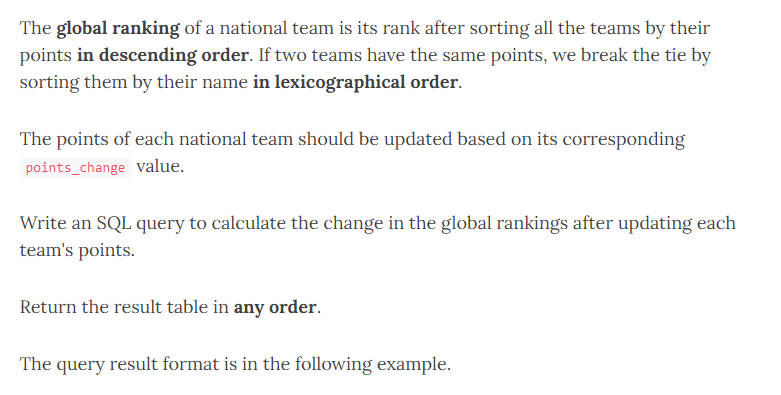

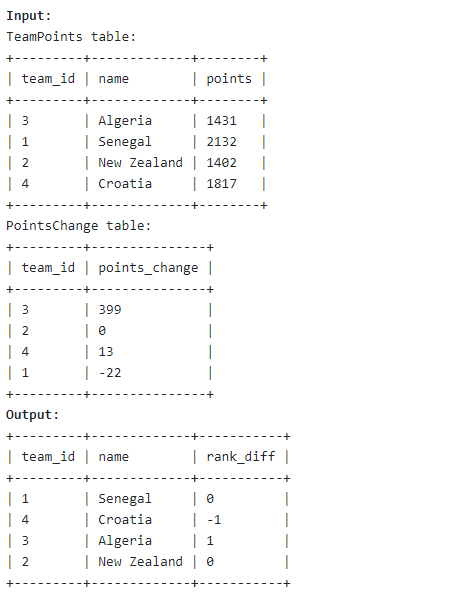

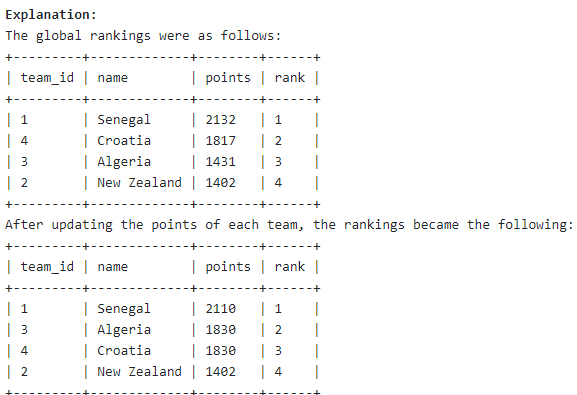

    Since after updating the points Algeria and Croatia have the same points, they are ranked according to their lexicographic order.
    Senegal lost 22 points but their rank did not change.
    Croatia gained 13 points but their rank decreased by one.
    Algeria gained 399 points and their rank increased by one.
    New Zealand did not gain or lose points and their rank did not change.

    with cte as 
    (
        select t.team_id,t.name,t.points,
        p.points_change, ROW_NUMBER() OVER(ORDER BY points DESC, name) AS initial_rank,
        ROW_NUMBER() OVER(ORDER BY points+points_change DESC, name) AS new_rank,
        FROM team_points t
        LEFT JOINT pointsChange p
        ON t.team_id = p.team_id    
    )

    select team_id,name,points,initial_rank-new_rank as rank_diff
    from cte